## Supervised Machine Learning for Glioma Classification in Brain Tumors

Final Project <br> Date: February 19th 2026

Gliomas are a type of brain tumor that emerges from the brain or spinal cord, and can be classified as either Lower Grade Glioma (LGG) or Glioblastoma Multiforme (GBM) depending on data found in scans/imaging. However, being able to accurately test and classify between LGG and GBM can not only be substantially difficult and expensive, but it can also be life-threatening as GBM is significantly more severe and requires extensive treatment. The purpose of this project is to build supervised models that are able to predict and determine Glioma grade as a more cost-effective and accurate way to improve tumor treatment. We will rely on the clinical mutation data provided by The Cancer Genome Atlas (TCGA) Project that can be found on the The UC Irvine Machine Learning Repository (1). The dataset contains 839 patient records, and 23 variables on their clinical mutation information.

(1)*Tasci, E., Camphausen, K., Krauze, A., & Zhuge, Y. (2022). Glioma Grading Clinical and Mutation Features [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R62J.*

**Objective**: Develop classification models that are able to differentiate between GBM and LGG using the dataset, and determine which genetic factors or other relationships can support in predicting their classification. We will also evaluate the model's performance using metrics such as precision and recall. </br>
**Problem Type**: Supervise Learning Problem, Binary Classification Task

Imports

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

### Loading the Data
Let's first load the data to inspect its contents, data types/features, and opportunities to clean and explore the set.

In [2]:
df=pd.read_csv("data/TCGA_Info.csv")
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset contains patient demographic information such as age, gender, race and mutation and gene variables such as IDH1, TP53, FUBP1 etc. Features are also split into categories: </br>
* Glioma Grade Classification:( 0=LGG, 1=GBM)
* Gender: (0=male, 1=female)
* Race: (0=White, 1=Black, 2=Asian, 3=Indigenous/Native)</br>
* For proteins: (0=NOT_MUTATED, 1=MUTATED)</br>

</br>Now to inspect the data size and data types:

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

The data types are correct in that there are 839 patient records and 23 features names.

Counts between LLG and GBM:

In [4]:
df['Grade'].value_counts()

Grade
0    487
1    352
Name: count, dtype: int64

### Cleaning the Data
The data will be examined for factors such as missing/duplicate values,any possible outliers and looking to see if all data types are correct. We will also examine feature distribution and ranges. First, any null values will be identified that may cause outliers in the data:

In [5]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

Checking for duplicates in the set:

In [6]:
df.duplicated().sum()
df[df.duplicated(keep=False)]

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
409,0,0,35.18,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,35.18,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since a duplicate record was found, we should remove it to eliminate bias and confirm that each record is its own unique observation.

In [7]:
df=df.drop_duplicates().reset_index(drop=True)

**Data Cleaning Summary:** The data contains the correct data types for all features, and there are no visible outliers or anomalies. We did identify a patient record that was a duplicate, and that was removed in order to prevent bias in further analysis.

## Exploratory Data Analysis (EDA)

Let's check for any potential class imbalance on Glioma grades to ensure that models are not affected:

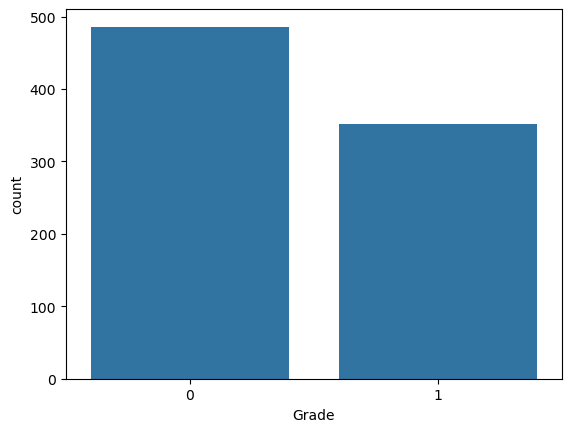

In [8]:
sns.countplot(x='Grade',data=df)
plt.show()

Based on the plot, this count seems reasonable, with some slight imbalance. About 480 patients have LGG while 350 patients have GBM, which would likely not cause major bias in models. Evaluation metrics can still be relied on such as precision and recall, and ROC-AUC to assess accuracy and how the model performs. </br>
Now let's check to confirm that the age at diagnosis is within a realistic range, and does not contain any outliers:

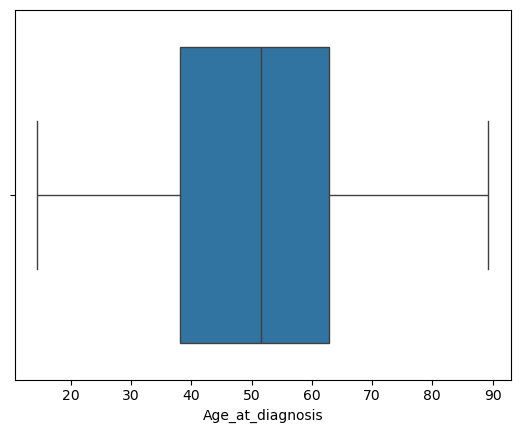

In [9]:
sns.boxplot(x=df['Age_at_diagnosis'])
plt.show()

Most patients are are between 45 and 65 years old, with the minimum age being closer to 15, and the maximum age at 90. We can observe that there are no extreme outliers.

**Comparing ages for either grade:**

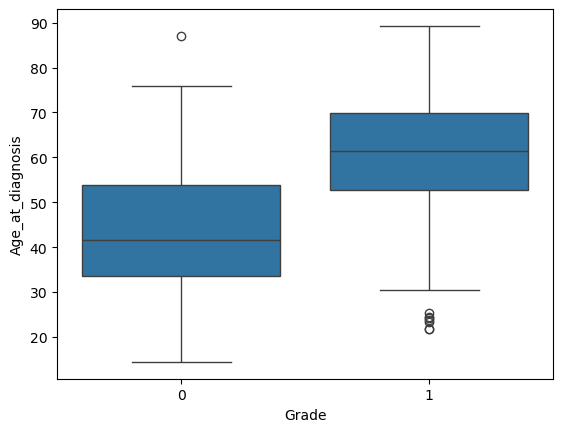

In [10]:
sns.boxplot(x='Grade',y='Age_at_diagnosis',data=df)
plt.show()

The median age for Grade 0 patients is around 42 years old, while Grade 0 patients have a medium age of around 61 years old. The minimum age range for Grade 1 patients is about 15 years older. The plot reveals that the age at diagnosis can be associated with Glioma grade and can be a useful feature to assess for predictions in models.

**Which proteins are associated with Grade?**

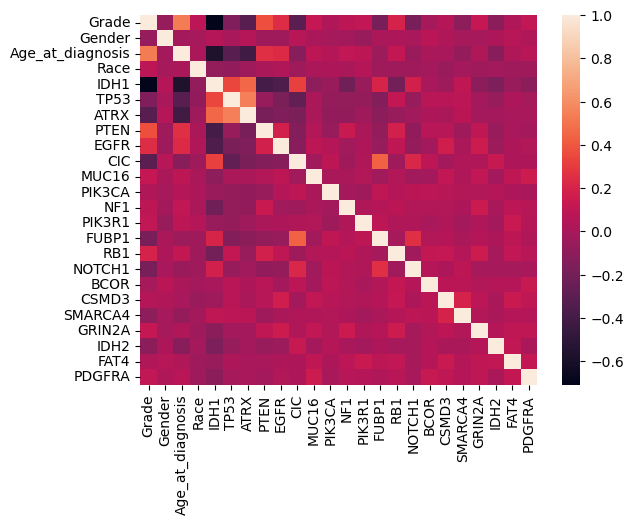

In [11]:
sns.heatmap(df.corr())
plt.show()

The correlation matrix shows that both EGFR, TP53, ATRX and IDH1 are proteins that have a strong correlation to the target variable. The age at diagnosis also points to a fairly moderate correlation with grade, and the previous plots suggest that older patients are more likely to be Grade 1.

**Assessing mutation features:**

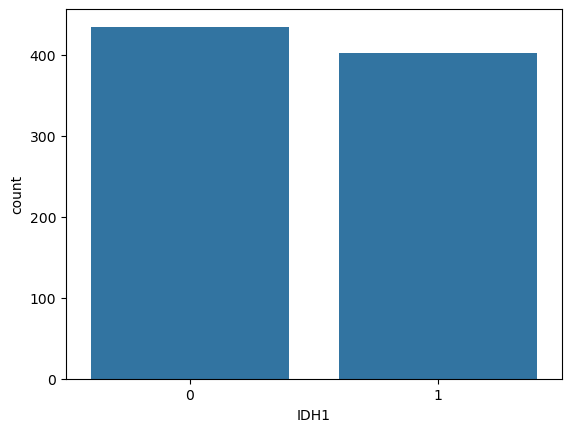

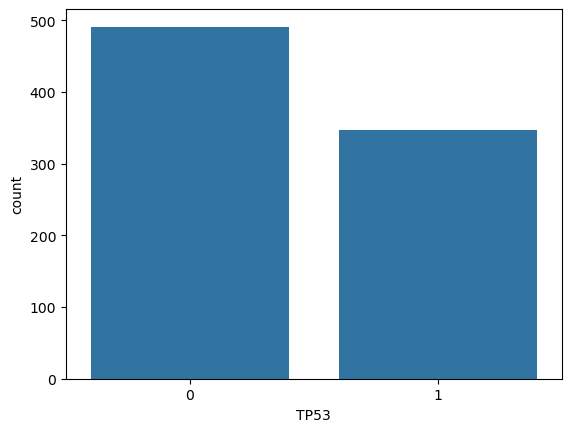

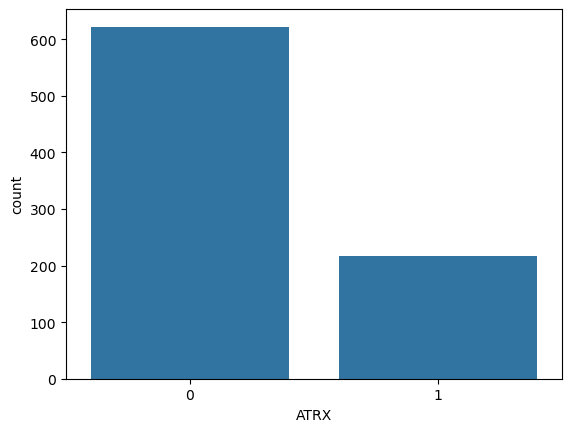

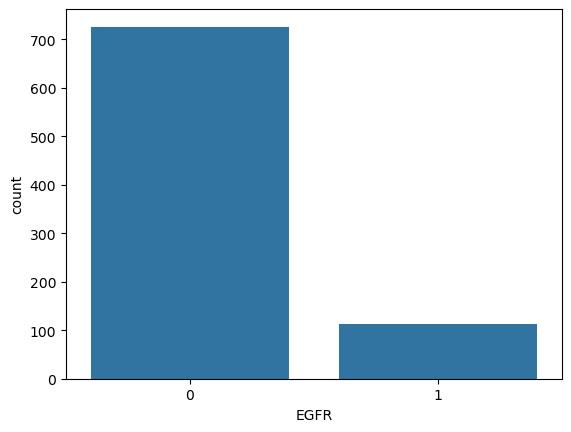

In [12]:
sns.countplot(x='IDH1',data=df)
plt.show()
sns.countplot(x='TP53',data=df)
plt.show()
sns.countplot(x='ATRX',data=df)
plt.show()
sns.countplot(x='EGFR',data=df)
plt.show()

The IDH1 mutation is relatively common in patients, while a TP53 mutation if found in a moderate amount of patients. Both the EGFR and ATRX mutation are relatively rare in patients. Referring back to the earlier correlation matrix, we can expect for these mutations to have a significant impact to predicting glioma grades.

**Mutation versus Grade:**

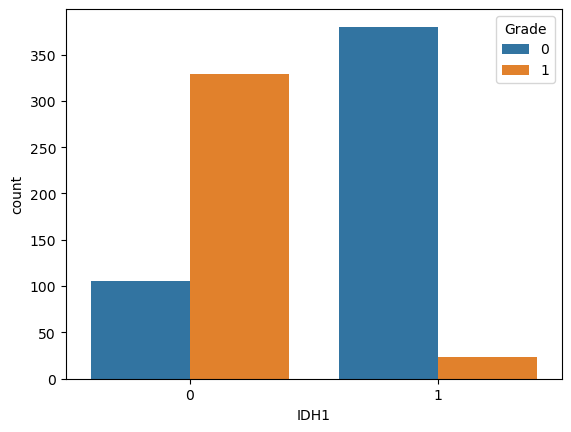

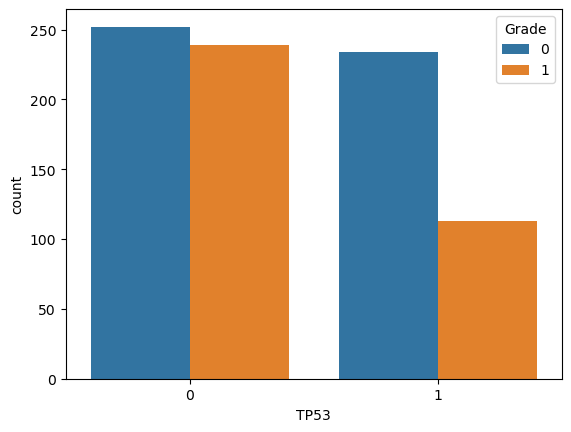

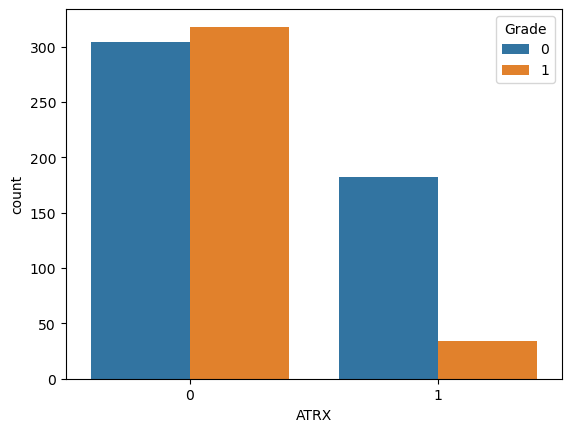

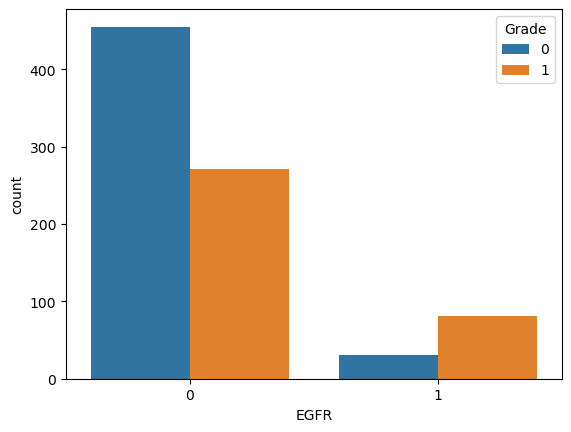

In [13]:
sns.countplot(x='IDH1',hue='Grade',data=df)
plt.show()
sns.countplot(x='TP53',hue='Grade',data=df)
plt.show()
sns.countplot(x='ATRX',hue='Grade',data=df)
plt.show()
sns.countplot(x='EGFR',hue='Grade',data=df)
plt.show()

Looking at the IDH1 plot, when a mutation is present, the overwhelming majority of patients are Grade 0 (LLG). The IDH1 mutation is therefore highly associated with Grade 0 (LLG) and is rarely associated with Grade 1 (GBM). In the TP53 plot, a mutation in this gene does appear in both grades, with a slight tendency to appear in Grade 0 patients. It can serve as an important predictive feature for Grade 0 patients, but not as strongly as the IDH1 mutation. In the ATRX plot, the overwhelming majority of patients with an ATRX mutation are Grade 0 compared to Grade 1 patients. The ATRX mutation is therefore highly associated with Grade 0 patients. Lastly, the EGFR mutation plot shows a strong association with Grade 1 patients, meaning that the EFGR mutation can also be an impactful predictive feature between Glioma grades and favoring Grade 1 patients.

**EDA findings:** Based on our plots and analysis, several important mutations in proteins were identified in strongly being associated with a Glioma grade (wheter LLG or GBM). It was identified that a mutation in both the IDH1 and ATRX mutation were strongly associated with Grade 0 patients, while mutations in the EFGR gene are strongly associated with Grade 1 patients. A box plot highlighting the distribution of ages between both grades also revealed that older patients tend to be Grade 1, with a median age of 61 years old. Meanwhile, Grade 0 patients had a younger median age of around 42 years old. This analysis concludes that these features are very likely to be important predictors in models, and that other mutation features may have weaker correlations but could contribute to model performance when combined with these genes.

## Models

The data will first be split in order to prevent overfitting and allow for an unbiased assessment. Different models will then be compared  based on their ability to correctly classify between LLG and GBM. Limitations and accuracy will then be evaluated. </br>
In our earlier matrix, no extreme collinearity was observed that would invalidate any of the model's performance, but a Random Forest model will be used as it can also assist with problems that arise with collinearity since it can handle assessing nonlinear relationships between the protein mutations and the Grades. A Logistic Regression model will also be used as the baseline model, while the Decision Tree Classifier will tested as an additional model to capture nonlinear relationships.

**Splitting the Data into training and testing sets:** </br>
Input features as X and the target variable (Grade) to evaluate performance on unseen data.

In [14]:
X=df.drop('Grade',axis=1)
y=df['Grade']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,
    random_state=42, stratify=y
)

Checking for data imbalance:

In [15]:
print(y_train.value_counts())
print(y_test.value_counts())

Grade
0    389
1    281
Name: count, dtype: int64
Grade
0    97
1    71
Name: count, dtype: int64


#### Logistic Regression Model:

The baseline model.

In [16]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train);

Cross-validation:

In [46]:
scores_log=cross_val_score(logmodel, X_train,y_train,scoring="roc_auc")
cross_log=scores_log.mean()
print(cross_log)

0.9146121422437211


Based on the cross-validation score, the Logistic Regression has a strong ability to differentiate between Grade 0 and Grade 1 across different datasets.

AUC and Accuracy:

In [22]:
ypred_log=logmodel.predict(X_test)
yprob_log=logmodel.predict_proba(X_test)[:,1]

accuracy_log=accuracy_score(y_test,ypred_log)
auc_log=roc_auc_score(y_test,yprob_log)

print('accuracy:',accuracy_log)
print('ROC-AUC', auc_log)

accuracy: 0.8630952380952381
ROC-AUC 0.920429795266444


#### Decision Tree model:

The decision tree depth (max_depth) was limited in order to prevent overfitting and reduce noise.

In [23]:
treemodel=DecisionTreeClassifier(
    max_depth=5,
    random_state=42)
treemodel.fit(X_train, y_train);

In [45]:
scores_tree=cross_val_score(treemodel,X_train,y_train,scoring="roc_auc")
cross_tree=scores_tree.mean()
print(cross_tree)

0.8882369823159296


The decision tree model performs slightly worse than the Logistic Regression model across different datasets, but still relatively well.

In [25]:
ypred_tree=treemodel.predict(X_test)
yprob_tree=treemodel.predict_proba(X_test)[:,1]

accuracy_tree=accuracy_score(y_test,ypred_tree)
auc_tree=roc_auc_score(y_test,yprob_tree)

print('accuracy:',accuracy_score(y_test,ypred_tree))
print('ROC-AUC',roc_auc_score(y_test,yprob_tree))

accuracy: 0.8452380952380952
ROC-AUC 0.8935675911136924


#### Random Forest model:

The random forest model was also lightly tuned to reduce variance.

In [26]:
rforestmodel=RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42)
rforestmodel.fit(X_train,y_train);

Cross-validation:

In [44]:
scores_rforest=cross_val_score(rforestmodel,X_train,y_train,scoring="roc_auc")
cross_rforest=scores_rforest.mean()
print(cross_rforest)

0.9061464850938534


In [30]:
ypred_rforest=rforestmodel.predict(X_test)
yprob_rforest=rforestmodel.predict_proba(X_test)[:,1]

accuracy_rforest=accuracy_score(y_test,ypred_rforest)
auc_rforest=roc_auc_score(y_test,yprob_rforest)

print('accuracy:',accuracy_score(y_test,ypred_rforest))
print('AUC:',roc_auc_score(y_test,yprob_rforest))

accuracy: 0.8630952380952381
AUC: 0.9274720487875707


## Results and Analysis

Choosing the best model:

In [48]:
results=pd.DataFrame({
    'model':['logistic regression','decision tree','random forest'],
    'accuracy':[accuracy_log,accuracy_tree,accuracy_rforest],
    'ROC-AUC':[auc_log,auc_tree,auc_rforest],
    'cross-validation':[cross_log,cross_tree,cross_rforest]
})
results.sort_values('cross-validation',ascending=False)

,model,accuracy,ROC-AUC,cross-validation
0,logistic regression,0.863095,0.920430,0.914612
2,random forest,0.863095,0.927472,0.906146
1,decision tree,0.845238,0.893568,0.888237


Based on rankings, the Random Forest model acheived the highest AUC score of 0.927, followed by Logistic Regression (0.920) and the Decision Tree model (0.894). ROC-AUC and accuracy were used as useful metrics to determine model performance, especially since a slight imbalance was detected between balance. Cross-validations results that were identified earlier however, showed that the Logistic Regression model performs exceptionally well across datasets, outperforming the Random Forest model with a mean AUC of 0.914. Based on these findings, it can be concluded that the best overall model for classification is the **Logistic Regression** model.

#### Plotting the ROC Curve to further evaluate all 3 models:

In [91]:
fpr_log,tpr_log,_=roc_curve(y_test,yprob_log)
fpr_tree,tpr_tree,_=roc_curve(y_test,yprob_tree)
fpr_rforest,tpr_rforest,_=roc_curve(y_test,yprob_rforest)

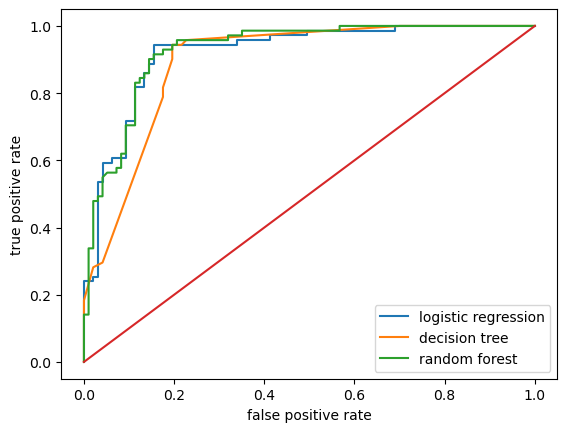

In [92]:
plt.plot(fpr_log,tpr_log, label=f'logistic regression')
plt.plot(fpr_tree,tpr_tree, label =f'decision tree')
plt.plot(fpr_rforest,tpr_rforest, label=f'random forest')

plt.plot([0,1],[0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

The ROC curve plot shows that both the Logistic Regression model and the Random Forest model have the strongest true positive rate, which means both models are able to accurately differentiate between Grades 0 and 1. 

#### Determining Feature Importance

Next, feature rankings will be determined in order to analyze how much each feature contributes to the accuracy score across trees. The random forest model will be used for this since it captures nonlinear relationships that can exists between mutations.

In [40]:
feature=pd.Series(rforestmodel.feature_importances_, index=X.columns)
feature_sorted=feature.sort_values(ascending=False).head(10)
feature_sorted

IDH1                0.378077
Age_at_diagnosis    0.208715
ATRX                0.085229
CIC                 0.075505
PTEN                0.066890
IDH2                0.028166
FUBP1               0.020715
EGFR                0.019296
NOTCH1              0.019271
RB1                 0.016120
dtype: float64

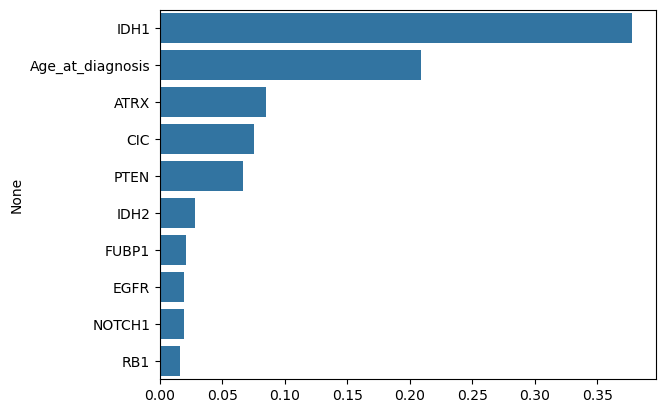

In [41]:
sns.barplot(x=feature_sorted.values,y=feature_sorted.index)
plt.show()

Asessing feature importance revealed that IDH1 mutation found in patients is the most important predictor for the Grade, followed by the age at diagnosis and the presence of an ATRX mutation. It can be concluded that both demogrpahic factors and certain gene mutations are strongly associated with differentiating between different grades of Gliomas (LLG and GBM). 

**Summary:** The three models were evaluated using ROC-AUC, accuracy and cross-validation scores. Based on the analysis, while the Random Forest model achieved the highest AUC score, the Logistic Regression model outperformed for cross validation, proving its ability to accurately differentiate between Grades across datasets. The Decision Tree model performed the worst overall, which can be attributed due to its tendency to overfit or high variance. Based on this assessment, it can be concluded that the Logistic Regression model is the best choice model for classification. </br> Plotting the ROC curve demonstrated that both the Logistic Regression model and the Random Forest model have a high true positive rate in terms of differentiating between classes. The final analysis of ranking features revealed that mutation to the IDH1 gene is the most important predictor of Grades by a significant amount, whereas the age at diagnosis can also influence the classification performance.

## Discussion and Conclusion

Overall, the purpose of this project was to examine the usefulness of classification models, and their ability to accurately differentiate between Lower Grade Glioma (LGG) and Glioblastoma Multiforme (GBM). This analysis was necessary in order for the those in the medical field to make accurate decisions for genetic testing and clinical treatments. The dataset included 23 variables involving different genes, as well as whether patients were positive for any mutations. Analysis on different features revealed that the most important predictors of Glioma grade were dependent on the presence of IDH1 mutations, as well as the age of diagnosis. For gene mutations, its presence in IDH1 significantly outranked other gene mutations in terms of importance, followed by ATRX to a much lesser extent. In terms of age, earlier plots demonstrated that the median age of patients with GBM was around 61 years old, while the median age of patients with LGG was around 42 years old. </br>

In comparing models, both the Random Forest model and the Logistic Regression model achieved very similar scores for ROC-AUC and accuracy in the test split, which made it difficult to determine the best model. The use of cross-validation in this analysis was therefore necessary to assess how models would perform across multiple datasets rather than a single test split. Running this test revealed that the Logistic Regression model was able to perform the Random Forest model, which may be attributed to the Random Forest's emphasizing complex nonlinear relationships that may not have been necessary for this project. Decision Trees performed the worst overall which can be attributed to overfitting. </br>

Some limitations that should be considered in this project is that the cohort of this dataset was relatively small, which can render analyzing more complex patterns difficult. Since some features could also have collinearity, which would weaken model performance. Some methods that were used to adjust models such as hyperparamater tuning was minimally used, but could be improved for future analysis. Ways to improve the work of this project would be to consider additional models for testing or possibly explore how different genes and their mutations can interact or affect each other. It would also be helpful to increase the size of the cohort so that there is a greater variety of patient observations and further improve complex understanding of factors that are associated with Glioma types.